In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#using 2 antennas
dataset = pd.read_csv('human_walking_direction_odilbek_421.csv').drop('Unnamed: 0',axis=1)

1. We collected 100 packets every 5 secs for each behavior. 
2. 2000 samples for left, right, and no_person. 1000 samples for up.
3. We have 56 subcarrier and we will use 30 subcarriers
4. We have 2 * 2 antennas. So, we have four csi values at receiver (1_1, 1_2, 2_1, 2_2)=>(i_j), i for receiver and j for transmitter.
5. I will loop for each subcarrier and select 100 values for packet num for example subcarrier 0 contains 2000 values for no of packets, So 2000/100-> 20 behavior.
6. We have 30 subcarriers, then we will have 20*30=600 rows for left, right, and no person but for up 1000/100 * 30=300 therefore the total number of rows=600+600+600+300=2100
7. for columns, We have 100 packet for each antenna pair then 100*4=400 therefore We have 400 amplitudes, 400 phases and label col then the total number of columns=801
8. Therefore for each row we have the amplitudes and phases for 100 packets (one behavior)



1. s_n -> subcarrier num
2. a_n -> antenna_num
3. d_n -> data_num
4. tp_n ->  total number of packets for each behavior
5. tb_n ->  total number of behaviors for each activty
6. N  -> activities number
7. TR_n -> total number of rows
8. TC_n -> total number of columns
9. tb_n= d_n/tp_n    ->          (tb_n= 2000/100 =20   , tb_n= 1000/100 =10)
10. TR_n= tb_n*s_n*N   ->         (TR_n = 20*30*3 + 10*30*1=1800+300=2100)
11. TC_n= (tp_n * a_n  * 2) + 1  ->   (TC_n= (100*4*2)+1 = 801)
12. DS_n = TR_n * TC_n ->  (2100*801)

 

In [3]:
dataset.head()

,amplitude antenna1_1:0,amplitude antenna1_1:1,amplitude antenna1_1:2,amplitude antenna1_1:3,amplitude antenna1_1:4,amplitude antenna1_1:5,amplitude antenna1_1:6,amplitude antenna1_1:7,amplitude antenna1_1:8,amplitude antenna1_1:9,...,amplitude antenna2_2:391,amplitude antenna2_2:392,amplitude antenna2_2:393,amplitude antenna2_2:394,amplitude antenna2_2:395,amplitude antenna2_2:396,amplitude antenna2_2:397,amplitude antenna2_2:398,amplitude antenna2_2:399,label
0,42.773096,42.701176,42.506203,42.254586,41.895300,41.529583,40.793562,40.649958,42.418107,41.035142,...,235.429541,228.242805,229.630078,229.784285,229.621098,230.654524,230.617554,229.064384,231.714924,left_direction
1,48.713106,44.556385,40.667241,48.583663,48.616275,39.976278,44.711915,45.268109,44.687255,43.446372,...,237.305490,246.295887,238.753839,247.127076,250.100350,248.168053,228.996130,243.042022,225.731199,left_direction
2,57.289410,58.097449,43.261117,60.599722,51.776555,48.872093,44.658915,48.632997,45.315091,43.916133,...,230.066704,231.817922,233.352313,234.819469,235.070078,234.668114,234.524527,244.230859,234.070135,left_direction
3,51.988282,50.888754,50.038657,48.877740,47.790277,46.591354,47.141209,44.257762,43.811334,44.329619,...,248.102835,236.516990,229.357771,226.404191,225.287506,227.810425,228.923298,228.196061,227.736003,left_direction
4,53.552511,52.918586,52.342523,52.181257,51.631706,51.972897,45.237778,53.413828,50.295040,46.274109,...,215.266473,218.430615,218.624450,234.060008,214.588883,221.428360,223.890006,224.572010,225.779584,left_direction


C:\Users\hanan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


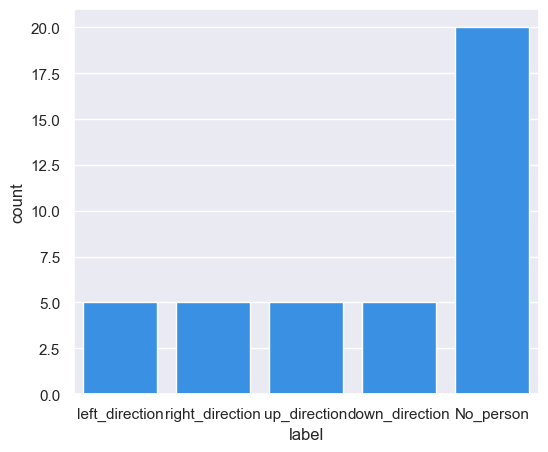

In [4]:
import seaborn as sns

sns.set(color_codes=True)

plt.figure(0, (6, 5))
sns_plot = sns.countplot(dataset['label'], color="dodgerblue", label="Compact")


# Train the dataset

In [5]:
#Data encoding: to convert categorical features to numberical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['label']=label_encoder.fit_transform(dataset['label'])

In [6]:
dataset

,amplitude antenna1_1:0,amplitude antenna1_1:1,amplitude antenna1_1:2,amplitude antenna1_1:3,amplitude antenna1_1:4,amplitude antenna1_1:5,amplitude antenna1_1:6,amplitude antenna1_1:7,amplitude antenna1_1:8,amplitude antenna1_1:9,...,amplitude antenna2_2:391,amplitude antenna2_2:392,amplitude antenna2_2:393,amplitude antenna2_2:394,amplitude antenna2_2:395,amplitude antenna2_2:396,amplitude antenna2_2:397,amplitude antenna2_2:398,amplitude antenna2_2:399,label
0,42.773096,42.701176,42.506203,42.254586,41.895300,41.529583,40.793562,40.649958,42.418107,41.035142,...,235.429541,228.242805,229.630078,229.784285,229.621098,230.654524,230.617554,229.064384,231.714924,2
1,48.713106,44.556385,40.667241,48.583663,48.616275,39.976278,44.711915,45.268109,44.687255,43.446372,...,237.305490,246.295887,238.753839,247.127076,250.100350,248.168053,228.996130,243.042022,225.731199,2
2,57.289410,58.097449,43.261117,60.599722,51.776555,48.872093,44.658915,48.632997,45.315091,43.916133,...,230.066704,231.817922,233.352313,234.819469,235.070078,234.668114,234.524527,244.230859,234.070135,2
3,51.988282,50.888754,50.038657,48.877740,47.790277,46.591354,47.141209,44.257762,43.811334,44.329619,...,248.102835,236.516990,229.357771,226.404191,225.287506,227.810425,228.923298,228.196061,227.736003,2
4,53.552511,52.918586,52.342523,52.181257,51.631706,51.972897,45.237778,53.413828,50.295040,46.274109,...,215.266473,218.430615,218.624450,234.060008,214.588883,221.428360,223.890006,224.572010,225.779584,2
5,64.120560,63.232360,62.044570,60.383611,58.249150,56.175797,54.245987,52.486857,50.991814,49.553537,...,231.247373,232.789728,230.361037,220.674323,220.665518,230.551372,229.286753,200.433472,215.448861,3
6,64.421791,66.728970,52.678372,50.105456,59.838912,65.184240,66.944579,66.866745,63.557642,61.157834,...,151.665569,102.134429,145.164662,241.426337,239.888659,277.086684,165.559474,250.474896,165.013634,3
7,194.582408,71.306215,81.427729,77.593188,79.774028,88.720183,90.871125,90.177179,84.361320,79.666261,...,227.062138,222.977019,242.339886,242.451583,232.919328,229.404254,236.027671,262.166373,251.777402,3
8,81.832362,80.656770,79.422595,78.526545,78.130169,76.996058,75.075634,72.284022,68.530027,64.970329,...,237.183872,200.338270,213.670569,186.995189,221.333724,216.051210,213.881038,248.085442,208.940242,3
9,172.319309,36.809751,59.194551,66.079593,68.761559,80.715518,85.267170,88.533390,89.349828,89.771135,...,109.168521,133.198202,94.684347,141.815169,97.056582,103.289423,101.769211,93.102198,92.547336,3


In [7]:
dataset['label'].unique()

array([2, 3, 4, 1, 0])

In [8]:
y=dataset['label']

In [9]:
X=dataset.drop('label',axis=1)

In [10]:
y

0     2
1     2
2     2
3     2
4     2
5     3
6     3
7     3
8     3
9     3
10    4
11    4
12    4
13    4
14    4
15    1
16    1
17    1
18    1
19    1
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
Name: label, dtype: int32

In [11]:
#Trainset Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state=123)

In [12]:
X_train.shape

(32, 1600)

In [13]:
X_test.shape

(8, 1600)

 2      3     4    1    0:
left   right  up  down  No

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test have shapes (326, 1600) and (82, 1600), respectively

# Reshape X_train and X_test to match the assumed input shape of the model
#X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1600, 1))
#X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1600, 1))
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values.reshape(X_train.shape[0], -1))
X_test_scaled = scaler.transform(X_test.values.reshape(X_test.shape[0], -1))

X_train_reshaped = np.reshape(X_train_scaled, (X_train.shape[0], 1600, 1))
X_test_reshaped = np.reshape(X_test_scaled, (X_test.shape[0], 1600, 1))

# Define the model
model_cnn = Sequential()

# Add a 1D Convolutional layer
model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(1600, 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())  # Flatten the output for the dense layers

# Add dense layers
model_cnn.add(Dense(512, activation='relu'))
model_cnn.add(Dense(256, activation='relu'))
model_cnn.add(Dense(128, activation='relu'))

# Output layer with 5 classes (assuming 5 different activities)
model_cnn.add(Dense(5, activation='softmax'))

# Compile the model with run_eagerly=True
model_cnn.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'], run_eagerly=True)

# Print model summary
model_cnn.summary()

# Train the model
history_cnn = model_cnn.fit(X_train_reshaped, y_train.values, epochs=100, batch_size=128, validation_data=(X_test_reshaped, y_test.values))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1598, 32)          128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 799, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 797, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 398, 64)          0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 25472)             0         
                                                                 
 dense (Dense)               (None, 512)               1

1/1 [==============================] - 0s 155ms/step - loss: 2.3469e-07 - accuracy: 1.0000 - val_loss: 0.6933 - val_accuracy: 0.7500
Epoch 46/100
1/1 [==============================] - 0s 145ms/step - loss: 2.3469e-07 - accuracy: 1.0000 - val_loss: 0.7068 - val_accuracy: 0.7500
Epoch 47/100
1/1 [==============================] - 0s 153ms/step - loss: 2.3097e-07 - accuracy: 1.0000 - val_loss: 0.7192 - val_accuracy: 0.7500
Epoch 48/100
1/1 [==============================] - 0s 159ms/step - loss: 2.2352e-07 - accuracy: 1.0000 - val_loss: 0.7305 - val_accuracy: 0.7500
Epoch 49/100
1/1 [==============================] - 0s 153ms/step - loss: 2.1979e-07 - accuracy: 1.0000 - val_loss: 0.7409 - val_accuracy: 0.7500
Epoch 50/100
1/1 [==============================] - 0s 167ms/step - loss: 2.1234e-07 - accuracy: 1.0000 - val_loss: 0.7505 - val_accuracy: 0.7500
Epoch 51/100
1/1 [==============================] - 0s 152ms/step - loss: 2.0862e-07 - accuracy: 1.0000 - val_loss: 0.7592 - val_accuracy

# classification using ML models

In [14]:
RF_Accuracy=[]
SVM_Accuracy=[]
KNN_Accuracy=[]

# 1. Random Forest Classifier

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.ensemble import RandomForestClassifier

classifier_rfc=RandomForestClassifier(max_depth=12)
classifier_rfc.fit(X_train,y_train)
y_pred_rfc=classifier_rfc.predict(X_train)
print("the accuracy of training data: ", accuracy_score(y_train,y_pred_rfc))
y_pred_rfc_test=classifier_rfc.predict(X_test)
print("the accuracy of testing data:  ", accuracy_score(y_test,y_pred_rfc_test))
RF_Accuracy.append(accuracy_score(y_test,y_pred_rfc_test))

the accuracy of training data:  1.0
the accuracy of testing data:   0.375


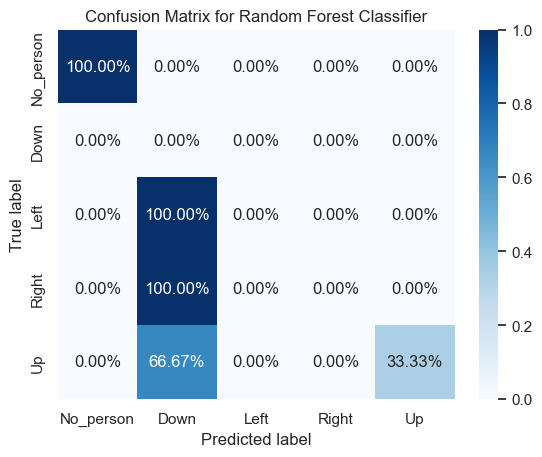

In [17]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc_test, normalize='true')
class_names = ["No_person","Down","Left","Right", "Up"]

# Plot confusion matrix as heatmap

sns.heatmap(cm_rfc, annot=True, cmap="Blues", fmt=".2%", vmin=0, vmax=1,xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [18]:
precision_rfc = precision_score(y_test, y_pred_rfc_test, average='micro')
recall_rfc = recall_score(y_test, y_pred_rfc_test, average='micro')
f1_rfc = f1_score(y_test, y_pred_rfc_test, average='micro')
accuracy_rfc = accuracy_score(y_test, y_pred_rfc_test)

print('Different metrics for testing data')
print("Precision: ", precision_rfc)
print("Recall: ", recall_rfc)
print("F1 score: ", f1_rfc)
print("Accuracy: ", accuracy_rfc)

Different metrics for testing data
Precision:  0.375
Recall:  0.375
F1 score:  0.375
Accuracy:  0.375


In [19]:
report_rfc = classification_report(y_test, y_pred_rfc_test)
print("Classification report for Random Forest:")
print(report_rfc)

Classification report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       1.00      0.33      0.50         3

    accuracy                           0.38         8
   macro avg       0.40      0.27      0.30         8
weighted avg       0.62      0.38      0.44         8



C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_cla

C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_cla

Text(0.5, 1.0, 'Random Forest')

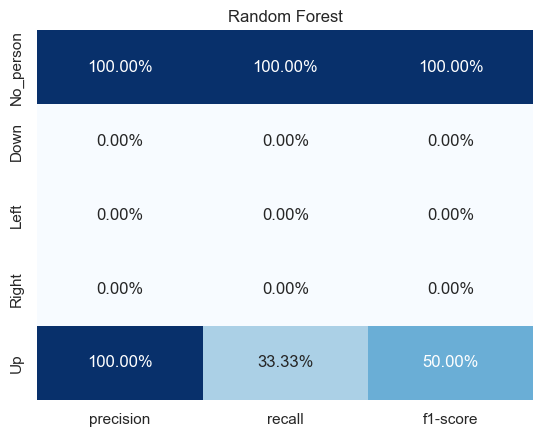

In [20]:
report_rfc = classification_report(y_test, y_pred_rfc_test, output_dict=True)
report_rfc_df = pd.DataFrame(report_rfc).transpose()
class_names = ["No_person","Down","Left","Right", "Up"]
report_rfc_df=report_rfc_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=0)
report_rfc_df=report_rfc_df.drop(['support'], axis=1)
sns.heatmap(report_rfc_df, annot=True, cmap='Blues', fmt='.2%', cbar=False, yticklabels=class_names)
plt.title("Random Forest")


# 1.2 Support Vector Machine

In [21]:
from sklearn import svm
classifier_svm = svm.SVC(kernel='linear')
classifier_svm.fit(X_train,y_train)
y_pred_svm=classifier_svm.predict(X_train)
print("the accuracy of training data: ", accuracy_score(y_train,y_pred_svm))
y_pred_svm_test=classifier_svm.predict(X_test)
print("the accuracy of testing data:  ", accuracy_score(y_test,y_pred_svm_test))
SVM_Accuracy.append(accuracy_score(y_test,y_pred_svm_test))

the accuracy of training data:  1.0
the accuracy of testing data:   0.875


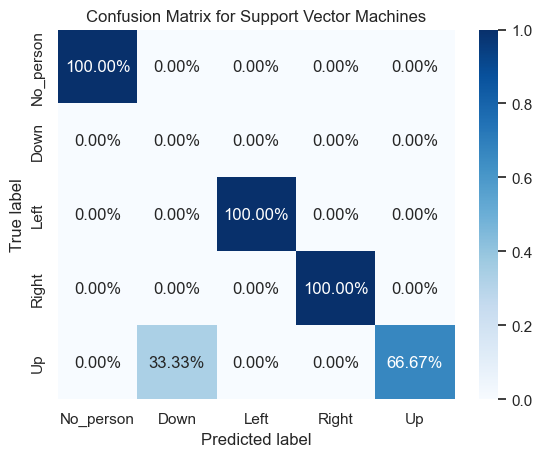

In [22]:
cm_svm = confusion_matrix(y_test, y_pred_svm_test, normalize='true')
class_names = ["No_person","Down","Left","Right", "Up"]

# Plot confusion matrix as heatmap

sns.heatmap(cm_svm, annot=True, cmap="Blues", fmt=".2%", vmin=0, vmax=1,xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for Support Vector Machines")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [23]:
precision_svm = precision_score(y_test, y_pred_svm_test, average='micro')
recall_svm = recall_score(y_test, y_pred_svm_test, average='micro')
f1_svm = f1_score(y_test, y_pred_svm_test, average='micro')
accuracy_svm = accuracy_score(y_test, y_pred_svm_test)

print('Different metrics for testing data')
print("Precision: ", precision_svm)
print("Recall: ", recall_svm)
print("F1 score: ", f1_svm)
print("Accuracy: ", accuracy_svm)

Different metrics for testing data
Precision:  0.875
Recall:  0.875
F1 score:  0.875
Accuracy:  0.875


In [24]:
report_svm = classification_report(y_test, y_pred_svm_test)
print("Classification report for Support Vector Machines:")
print(report_svm)

Classification report for Support Vector Machines:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      0.67      0.80         3

    accuracy                           0.88         8
   macro avg       0.80      0.73      0.76         8
weighted avg       1.00      0.88      0.93         8



C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Support Vector Machines')

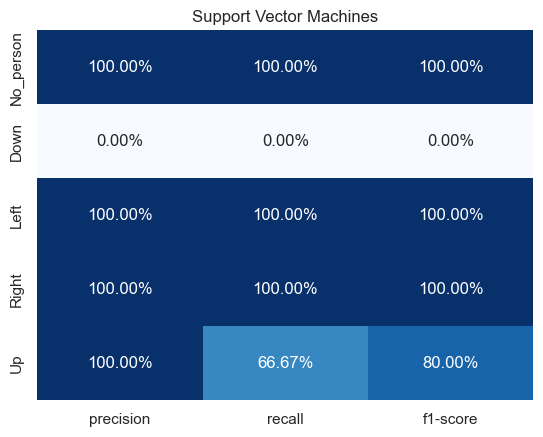

In [25]:
report_svm = classification_report(y_test, y_pred_svm_test, output_dict=True)
report_svm_df = pd.DataFrame(report_svm).transpose()
class_names = ["No_person","Down","Left","Right", "Up"]
report_svm_df=report_svm_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=0)
report_svm_df=report_svm_df.drop(['support'], axis=1)
sns.heatmap(report_svm_df, annot=True, cmap='Blues', fmt='.2%', cbar=False, yticklabels=class_names)
plt.title("Support Vector Machines")


# 1.3 K-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=3,weights='distance',p=1)
classifier_knn.fit(X_train,y_train)
y_pred_knn=classifier_knn.predict(X_train)
print("the accuracy of training data: ", accuracy_score(y_train,y_pred_knn))
y_pred_knn_test=classifier_knn.predict(X_test)
print("the accuracy of testing data:  ", accuracy_score(y_test,y_pred_knn_test))
KNN_Accuracy.append(accuracy_score(y_test,y_pred_knn_test))

the accuracy of training data:  1.0
the accuracy of testing data:   0.75


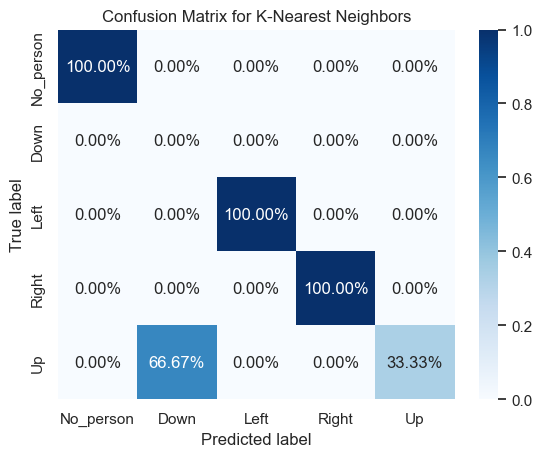

In [27]:
cm_knn = confusion_matrix(y_test, y_pred_knn_test, normalize='true')
class_names = ["No_person","Down","Left","Right", "Up"]

# Plot confusion matrix as heatmap

sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt=".2%", vmin=0, vmax=1,xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [28]:
precision_knn = precision_score(y_test, y_pred_knn_test, average='micro')
recall_knn = recall_score(y_test, y_pred_knn_test, average='micro')
f1_knn = f1_score(y_test, y_pred_knn_test, average='micro')
accuracy_knn = accuracy_score(y_test, y_pred_knn_test)

print('Different metrics for testing data')
print("Precision: ", precision_knn)
print("Recall: ", recall_knn)
print("F1 score: ", f1_knn)
print("Accuracy: ", accuracy_knn)

Different metrics for testing data
Precision:  0.75
Recall:  0.75
F1 score:  0.75
Accuracy:  0.75


In [29]:
report_knn = classification_report(y_test, y_pred_knn_test)
print("Classification report for K-Nearest Neighbors:")
print(report_knn)

Classification report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      0.33      0.50         3

    accuracy                           0.75         8
   macro avg       0.80      0.67      0.70         8
weighted avg       1.00      0.75      0.81         8



C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'K-Nearest Neighbors')

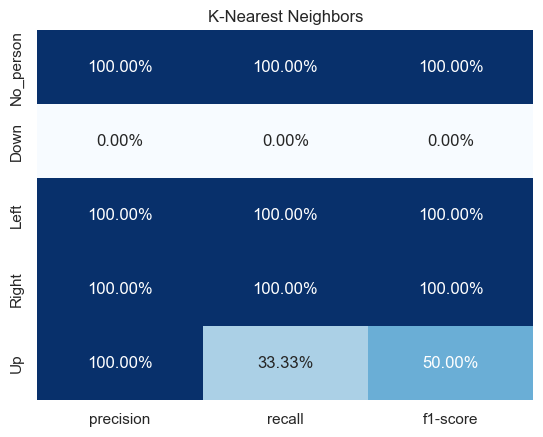

In [30]:
report_knn = classification_report(y_test, y_pred_knn_test, output_dict=True)
report_knn_df = pd.DataFrame(report_knn).transpose()
class_names = ["No_person","Down","Left","Right", "Up"]
report_knn_df=report_knn_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=0)
report_knn_df=report_knn_df.drop(['support'], axis=1)
sns.heatmap(report_knn_df, annot=True, cmap='Blues', fmt='.2%', cbar=False, yticklabels=class_names)
plt.title("K-Nearest Neighbors")


In [31]:
RF_accuracy=pd.DataFrame(data=RF_Accuracy[0:],
                columns=['RF'])

SVM_accuracy=pd.DataFrame(data=SVM_Accuracy[0:],
                columns=['SVM'])

KNN_accuracy=pd.DataFrame(data=KNN_Accuracy[0:],
                columns=['KNN'])
df_accuracy_new = pd.concat([RF_accuracy,SVM_accuracy,KNN_accuracy], axis=1)
df_accuracy_existing = pd.read_csv('human_walking_direction_df_accuracy_all_volunteers.csv').drop('Unnamed: 0',axis=1)
df_accuracy = df_accuracy_existing.append(df_accuracy_new, ignore_index=True)
df_accuracy

C:\Users\hanan\AppData\Local\Temp\ipykernel_25620\3372602396.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_accuracy = df_accuracy_existing.append(df_accuracy_new, ignore_index=True)


,RF,SVM,KNN
0,0.500000,0.625000,0.875000
1,0.875000,1.000000,1.000000
2,0.500000,0.625000,0.750000
3,0.625000,1.000000,1.000000
4,0.666667,0.777778,0.666667
5,0.625000,0.875000,0.875000
6,0.666667,0.777778,0.666667
7,0.750000,1.000000,1.000000
8,0.777778,0.888889,0.777778
9,0.666667,1.000000,1.000000


In [32]:
df_accuracy.to_csv(r'human_walking_direction_df_accuracy_all_volunteers.csv')